In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv")

In [3]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model building
#Evaluation
#improvement
#website
#deploy

# 1. Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.sample(5)

,Category,Message
538,ham,Or maybe my fat fingers just press all these b...
4998,ham,Esplanade lor. Where else...
1740,ham,U guys never invite me anywhere :(
1231,ham,I want to send something that can sell fast. ...
3052,ham,Awesome question with a cute answer: Someone a...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
data['Category'] = encoder.fit_transform(data['Category'])

In [10]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
data.isna().sum()

Category    0
Message     0
dtype: int64

In [12]:
data.duplicated().sum()

415

In [13]:
#remove duplicates
data = data.drop_duplicates(keep='first')

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(5157, 2)

# 2. EDA

In [16]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

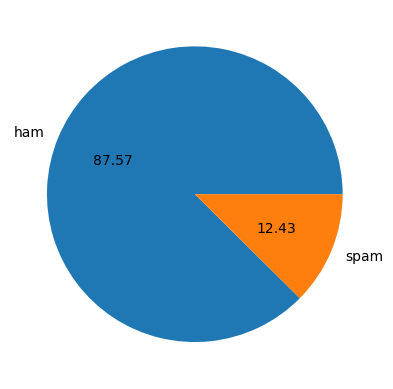

In [18]:
import matplotlib.pyplot as plt 
plt.pie(data['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalnced

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
data['num_characters'] = data['Message'].apply(len)

KeyError: 'Message'

In [25]:
data.head(5)



,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#num of words 
data['num_words'] =data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_19028\2973517541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] =data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
data.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
data['num_sentences'] =data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_19028\1833337984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] =data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [29]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham message
data[data['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam message
data[data['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
import seaborn as sns

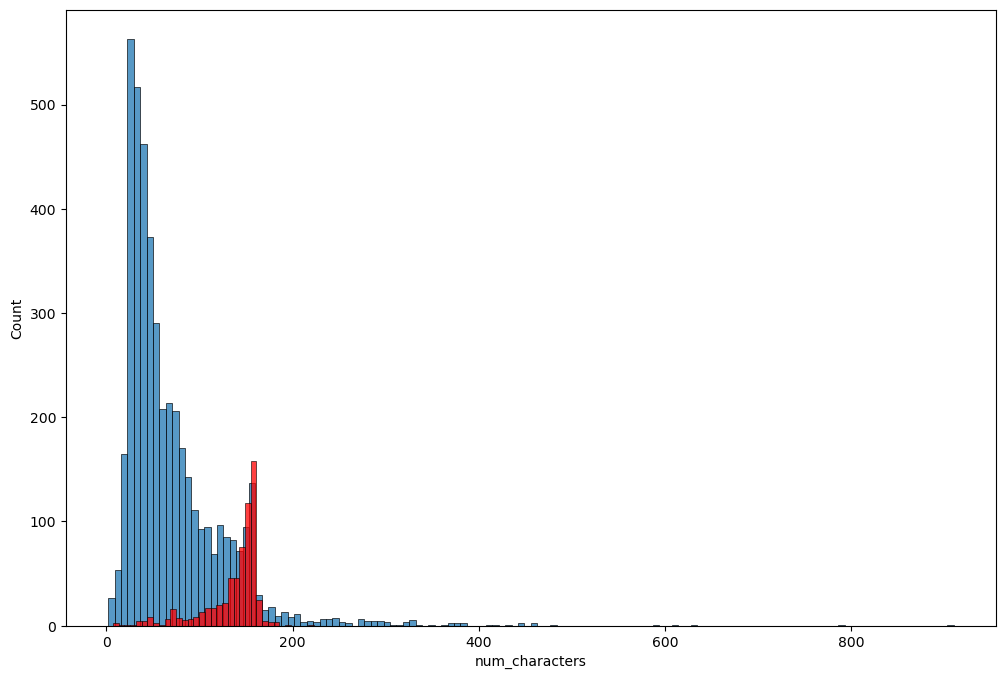

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['Category' ]==0]['num_characters'])
sns.histplot(data[data['Category' ]==1]['num_characters'],color='red')
plt.show()

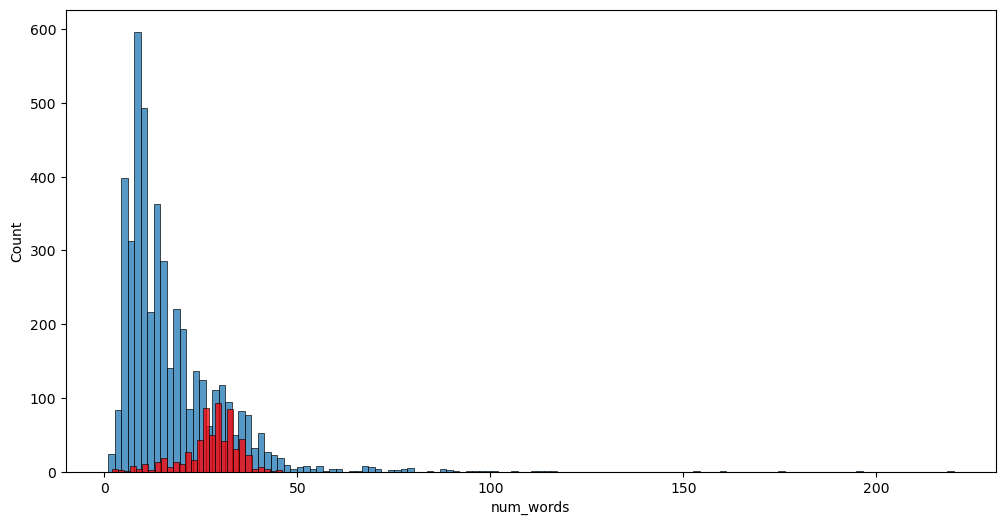

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category' ]==0]['num_words'])
sns.histplot(data[data['Category' ]==1]['num_words'],color='red')
plt.show()

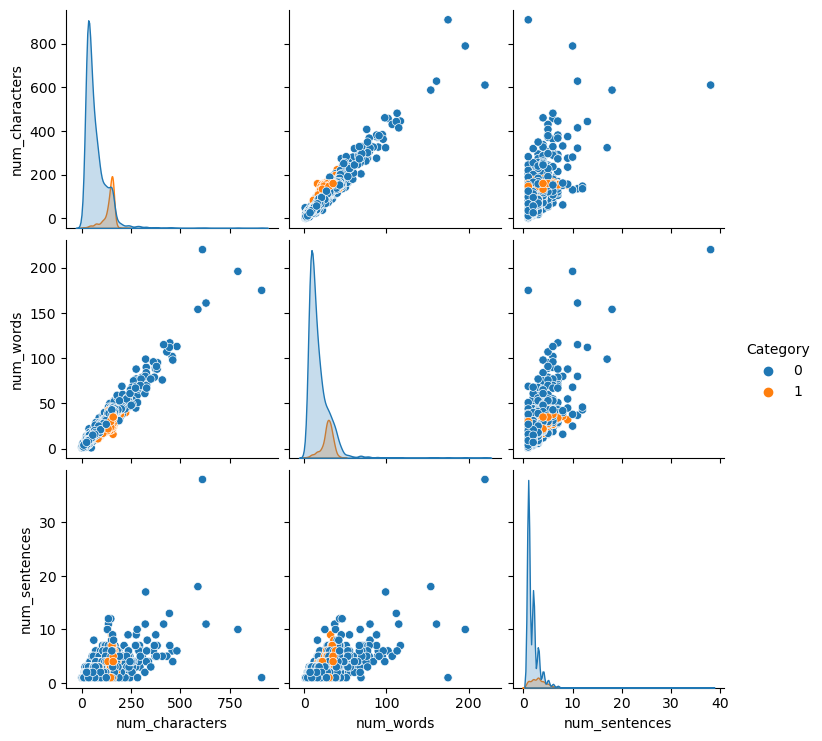

In [36]:
sns.pairplot(data,hue='Category')

C:\Users\Admin\AppData\Local\Temp\ipykernel_19028\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

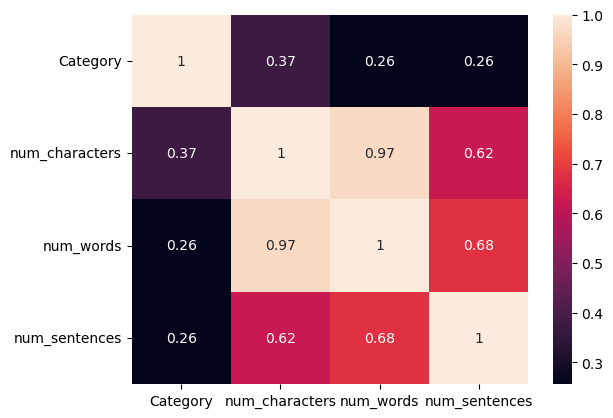

In [37]:
sns.heatmap(data.corr(),annot=True)

# 3. Data Preprocesing

In [38]:
#lower case
# tokenization

# remove special characters
# remove stop words and punctution
# stemming

In [39]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
transform_text("hello my name is harsh !")

'hello name harsh'

In [45]:
data['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
data['transformed_text'] = data['Message'].apply(transform_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19028\703559041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['Message'].apply(transform_text)


In [47]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(data[data['Category'] == 1]['transformed_text'].str.cat(sep=" "))

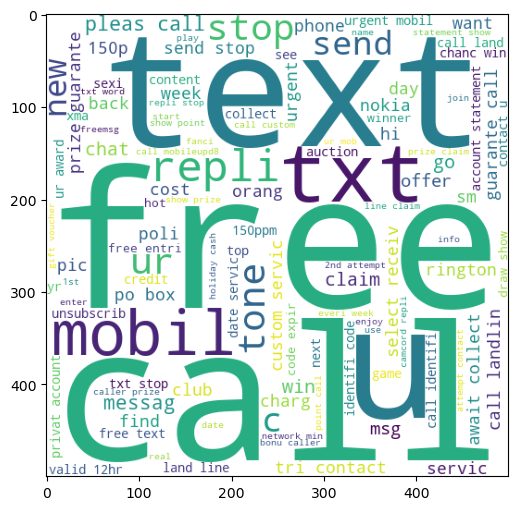

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(data[data['Category'] == 0]['transformed_text'].str.cat(sep=" "))

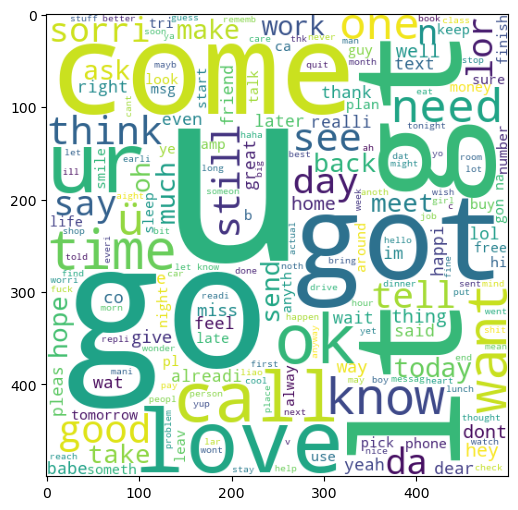

In [52]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [53]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in data[data['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [55]:
len(spam_corpus)

9781

In [56]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0         call
1         free
2            2
3          txt
4         text
5           ur
6            u
7        mobil
8         stop
9        repli
10       claim
11           4
12       prize
13         get
14         new
15      servic
16        send
17        tone
18      urgent
19       award
20       nokia
21     contact
22       phone
23        cash
24       pleas
25        week
26         win
27         min
28           c
29    guarante
Name: 0, dtype: object

In [57]:
from collections import Counter


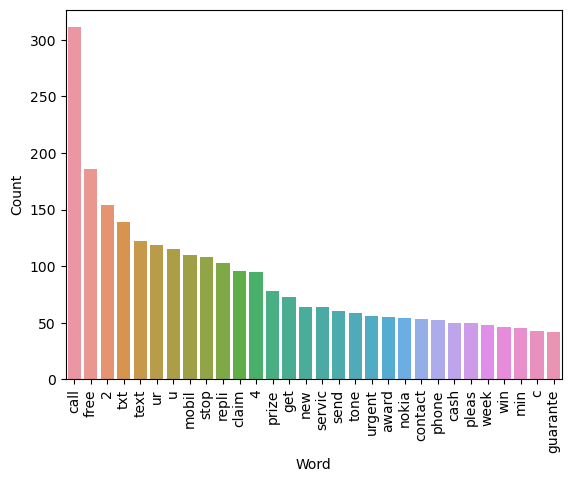

In [58]:
spam_counter = Counter(spam_corpus)
common_spam = spam_counter.most_common(30)

df_common_spam = pd.DataFrame(common_spam, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=df_common_spam)
plt.xticks(rotation='vertical')
plt.show()


In [59]:
ham_corpus = []
for msg in data[data['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)


35940

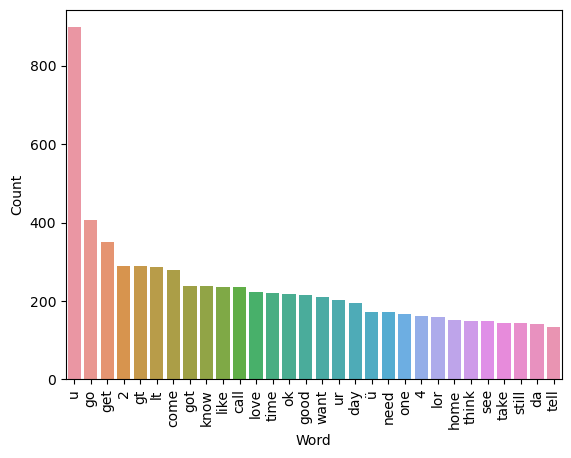

In [61]:
ham_counter = Counter(ham_corpus)
common_ham = ham_counter.most_common(30)

df_common_ham = pd.DataFrame(common_ham, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=df_common_ham)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
data.head()


,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4.Model Building

In [63]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [64]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [65]:
X.shape

(5157, 6781)

In [66]:
y = data['Category'].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [71]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8691860465116279
[[786 119]
 [ 16 111]]
0.4826086956521739


In [73]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9796511627906976
[[895  10]
 [ 11 116]]
0.9206349206349206


In [74]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


# TF-Idf

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
#tfidf = TfidfVectorizer()  #first no change 
#in max_features then take max_Features=3000
tfidf = TfidfVectorizer(max_features=3000)

In [31]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

KeyError: 'transformed_text'

In [164]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [213]:
# appending the num_character col to X
#X = np.hstack((X,data['num_characters'].values.reshape(-1,1)))

In [77]:
X.shape

(5157, 3000)

In [78]:
y = data['Category'].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [82]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [83]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [84]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [85]:
# 2 option  -> precision_score 
# CountVectorizer - > BNB  -> 0.97
# Tfidf -> MNB -> 1.0
# we choose  Tfidf -> MNB  (beacuse of false positive zero )

# check for all algo

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9718992248062015, 0.9803921568627451)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9728682170542635
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941
For  xgb
Accuracy -  0.9728682170542635
Precision -  0.9714285714285714


In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904070,1.000000
2,NB,0.961240,1.000000
5,RF,0.967054,1.000000
8,ETC,0.973837,1.000000
0,SVC,0.971899,0.980392
9,GBDT,0.953488,0.975904
10,xgb,0.972868,0.962617
6,AdaBoost,0.963178,0.958763
4,LR,0.951550,0.923077
7,BgC,0.962209,0.907407


In [92]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [93]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904070
1,NB,Accuracy,0.961240
2,RF,Accuracy,0.967054
3,ETC,Accuracy,0.973837
4,SVC,Accuracy,0.971899
5,GBDT,Accuracy,0.953488
6,xgb,Accuracy,0.972868
7,AdaBoost,Accuracy,0.963178
8,LR,Accuracy,0.951550
9,BgC,Accuracy,0.962209


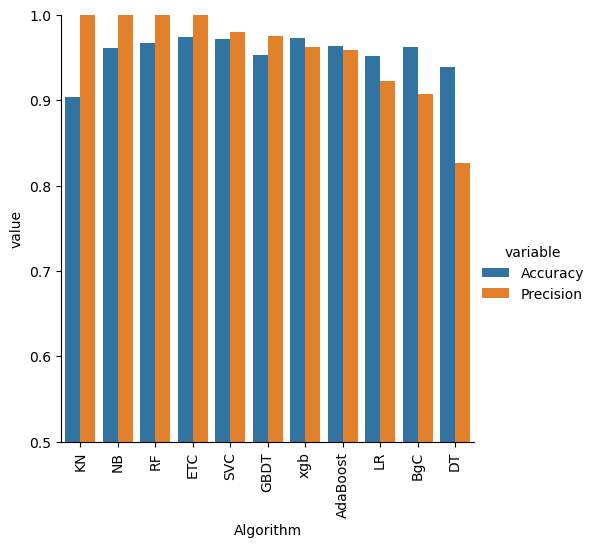

In [94]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# model improve

In [95]:
#1 change max_features  of TfIdf

In [158]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [159]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [161]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.904070,1.000000,0.912791,1.000000
1,NB,0.961240,1.000000,0.970930,1.000000
2,RF,0.967054,1.000000,0.972868,1.000000
3,ETC,0.973837,1.000000,0.977713,0.990566
4,SVC,0.971899,0.980392,0.975775,0.981132
5,GBDT,0.953488,0.975904,0.955426,0.976471
6,xgb,0.972868,0.962617,0.972868,0.971429
7,AdaBoost,0.963178,0.958763,0.966085,0.942308
8,LR,0.951550,0.923077,0.958333,0.937500
9,BgC,0.962209,0.907407,0.961240,0.891892


In [ ]:
#2 change scaling of x 

In [178]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [179]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [180]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.904070,1.000000,0.912791,1.000000,0.910853,1.000000
1,NB,0.961240,1.000000,0.970930,1.000000,0.981589,0.982143
2,RF,0.967054,1.000000,0.972868,1.000000,0.972868,1.000000
3,ETC,0.973837,1.000000,0.977713,0.990566,0.977713,0.990566
4,SVC,0.971899,0.980392,0.975775,0.981132,0.968023,0.927273
5,GBDT,0.953488,0.975904,0.955426,0.976471,0.955426,0.976471
6,xgb,0.972868,0.962617,0.972868,0.971429,0.972868,0.971429
7,AdaBoost,0.963178,0.958763,0.966085,0.942308,0.966085,0.942308
8,LR,0.951550,0.923077,0.958333,0.937500,0.964147,0.959184
9,BgC,0.962209,0.907407,0.961240,0.891892,0.961240,0.891892


In [ ]:
# add num_character column and run all algo

In [199]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [200]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.904070,1.000000,0.912791,1.000000,0.910853,1.000000,0.936047,0.747967
1,NB,0.961240,1.000000,0.970930,1.000000,0.981589,0.982143,0.939922,1.000000
2,RF,0.967054,1.000000,0.972868,1.000000,0.972868,1.000000,0.975775,1.000000
3,ETC,0.973837,1.000000,0.977713,0.990566,0.977713,0.990566,0.975775,1.000000
4,SVC,0.971899,0.980392,0.975775,0.981132,0.968023,0.927273,0.876938,0.000000
5,GBDT,0.953488,0.975904,0.955426,0.976471,0.955426,0.976471,0.953488,0.898990
6,xgb,0.972868,0.962617,0.972868,0.971429,0.972868,0.971429,0.970930,0.953271
7,AdaBoost,0.963178,0.958763,0.966085,0.942308,0.966085,0.942308,0.966085,0.896552
8,LR,0.951550,0.923077,0.958333,0.937500,0.964147,0.959184,0.966085,0.960000
9,BgC,0.962209,0.907407,0.961240,0.891892,0.961240,0.891892,0.969961,0.944444


# another way 

In [ ]:
#way 1

In [201]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [202]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [203]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [204]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.936046511627907
Precision 1.0


In [205]:
# way 2

In [206]:
#  stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [207]:
from sklearn.ensemble import StackingClassifier

In [208]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [209]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777131782945736
Precision 0.940677966101695


# conclusion

In [210]:
# we want a algo that follow
#Accuracy : 0.96 above 
#Precision: 1.0

In [211]:
# best algo with features is NB with 3000 feature 
# Accuracy : 0.970930
# Precision : 1.0

In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [2]:
print("hello")

hello


In [19]:
import nltk
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [22]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [23]:
X = data['Message']
y = data['Category']

In [24]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.values.reshape(-1, 1), y)


ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:

# Download NLTK resources (if not already downloaded)


# Function to transform text
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

# Load your dataset
df = pd.read_csv('spam.csv')

# Assuming you have a DataFrame 'df' with columns 'Category' and 'Message'
X = df['Message']
y = df['Category']


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.values.reshape(-1, 1), y)

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame({'Message': X_resampled.flatten(), 'Category': y_resampled})

# Vectorize the text data using TfidfVectorizer with max_features=3000
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df_resampled['Message']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_resampled['Category'], test_size=0.2, random_state=2)

# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv('spam.csv')

# Assuming you have a DataFrame 'df' with columns 'Category' and 'Message'
X = df['Message']
y = df['Category']

# Vectorize the text data using TfidfVectorizer with max_features=3000
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2)

# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.967713004484305


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import nltk
import string

# Assuming you have the necessary imports and nltk downloads
nltk.download('punkt')
nltk.download('stopwords')

# Function to transform text
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = nltk.stem.PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Sample data creation
data = pd.DataFrame({
    'Category': ['spam', 'ham'] * 50,
    'Message': ['spam message']*50 + ['ham message']*50
})

# Apply text transformation
data['transformed_text'] = data['Message'].apply(transform_text)

# Vectorize the text data using TfidfVectorizer with max_features=3000
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['transformed_text']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Category'], test_size=0.2, random_state=2)

# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = mnb.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.45
Confusion Matrix:
 [[6 4]
 [7 3]]


ValueError: pos_label=1 is not a valid label. It should be one of ['ham', 'spam']

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import nltk
import string

# Assuming you have the necessary imports and nltk downloads

# Function to transform text
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = nltk.stem.PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Sample data creation
data = pd.DataFrame({
    'Category': ['spam', 'ham'] * 50,
    'Message': ['spam message']*50 + ['ham message']*50
})

# Apply text transformation
data['transformed_text'] = data['Message'].apply(transform_text)

# Vectorize the text data using TfidfVectorizer with max_features=3000
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['transformed_text']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Category'], test_size=0.2, random_state=2)

# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = mnb.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2, pos_label='spam'))


Accuracy: 0.45
Confusion Matrix:
 [[6 4]
 [7 3]]
Precision Score: 0.42857142857142855


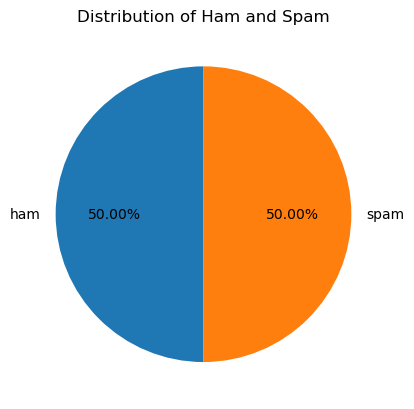

In [32]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'data' with the 'Category' column
# Replace 'data' with your actual DataFrame name if different
data = pd.DataFrame({
    'Category': ['spam', 'ham'] * 50,
    'Message': ['spam message']*50 + ['ham message']*50
})

# Create a pie chart
plt.pie(data['Category'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f%%", startangle=90)
plt.title('Distribution of Ham and Spam')
plt.show()


In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import nltk
import string

# Assuming you have the necessary imports and nltk downloads

# Function to transform text
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = nltk.stem.PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

# Sample data creation
data = pd.DataFrame({
    'Category': ['spam', 'ham'] * 50,
    'Message': ['spam message']*50 + ['ham message']*50
})

# Apply text transformation
data['transformed_text'] = data['Message'].apply(transform_text)

# Vectorize the text data using TfidfVectorizer with max_features=3000
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['transformed_text']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Category'], test_size=0.2, random_state=2)

# Train a Multinomial Naive Bayes classifier with Laplace smoothing (alpha=0.1)

# Make predictions on the test set


In [37]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Create a grid search object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameter
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best parameter
mnb = MultinomialNB(alpha=best_alpha)
mnb.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

In [38]:
y_pred2 = mnb.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2, pos_label='spam'))


Accuracy: 0.45
Confusion Matrix:
 [[6 4]
 [7 3]]
Precision Score: 0.42857142857142855


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Assuming you have a DataFrame 'df' with columns 'Category' and 'Message'
# Replace 'df' with your actual DataFrame name if different
df = pd.DataFrame({
    'Category': ['spam', 'ham'] * 50,
    'Message': ['spam message']*50 + ['ham message']*50
})

# Encode labels to numerical values
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=2)

# Tokenize and pad sequences
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 50  # Adjust as needed
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Build the LSTM model
embedding_dim = 16  # Adjust as needed
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100))  # Adjust the number of LSTM units as needed
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/5
3/3 [==============================] - 3s 287ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
3/3 [==============================] - 0s 48ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
3/3 [==============================] - 0s 47ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
3/3 [==============================] - 0s 48ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 32ms/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 50.00%


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
# Assuming your dataset has columns named 'Category' and 'Message'
# If not, replace these with your actual column names

# Preprocess the data
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have consistent length
max_sequence_length = 100  # Adjust as needed
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding="post", truncating="post")
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Convert labels to numpy array
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# Build the LSTM model
embedding_dim = 50  # Adjust as needed
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
epochs = 5  # Adjust as needed
batch_size = 32  # Adjust as needed
model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test_padded)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_labels)
conf_matrix = confusion_matrix(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Weighted Precision Score: {precision:.4f}")


Epoch 1/5
112/112 [==============================] - 10s 81ms/step - loss: 0.4380 - accuracy: 0.8645 - val_loss: 0.4158 - val_accuracy: 0.8576
Epoch 2/5
112/112 [==============================] - 9s 80ms/step - loss: 3.7123 - accuracy: 0.8684 - val_loss: 0.4101 - val_accuracy: 0.8576
Epoch 3/5
112/112 [==============================] - 9s 81ms/step - loss: 0.4014 - accuracy: 0.8679 - val_loss: 0.4100 - val_accuracy: 0.8576
Epoch 4/5
112/112 [==============================] - 9s 80ms/step - loss: 0.3971 - accuracy: 0.8679 - val_loss: 0.4101 - val_accuracy: 0.8576
Epoch 5/5
35/35 [==============================] - 1s 23ms/step
Test Accuracy: 86.64%
Confusion Matrix:
[[966   0]
 [149   0]]
Weighted Precision Score: 0.7506


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import joblib

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Assuming your dataset has columns named 'Category' and 'Message'
# If not, replace these with your actual column names
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Upsample the minority class (spam)
df_minority = df[df['Category'] == 1]
df_majority = df[df['Category'] == 0]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df_upsampled['Message'])
X_sequences = tokenizer.texts_to_sequences(df_upsampled['Message'])

# Pad sequences to have consistent length
max_sequence_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Convert labels to numpy array
y = np.asarray(df_upsampled['Category'])

# Build the LSTM model
embedding_dim = 50  # Adjust as needed
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  # Binary classification (spam or ham)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
epochs = 5  # Adjust as needed
batch_size = 32  # Adjust as needed
model.fit(X_padded, y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Save the trained model and tokenizer
model.save("spam_classifier_lstm.h5")
joblib.dump(tokenizer, "tokenizer.pkl")


Epoch 1/5
242/242 [==============================] - 21s 81ms/step - loss: 0.6652 - accuracy: 0.6197 - val_loss: 0.9662 - val_accuracy: 0.0000e+00
Epoch 2/5
242/242 [==============================] - 20s 82ms/step - loss: 0.6642 - accuracy: 0.6250 - val_loss: 0.9873 - val_accuracy: 0.0000e+00
Epoch 3/5
242/242 [==============================] - 20s 84ms/step - loss: 0.6633 - accuracy: 0.6250 - val_loss: 0.9466 - val_accuracy: 0.0000e+00
Epoch 4/5
242/242 [==============================] - 22s 92ms/step - loss: 62175.1328 - accuracy: 0.6250 - val_loss: 0.8729 - val_accuracy: 0.0000e+00
Epoch 5/5
242/242 [==============================] - 21s 86ms/step - loss: 0.6635 - accuracy: 0.6250 - val_loss: 0.9352 - val_accuracy: 0.0000e+00


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['tokenizer.pkl']

In [43]:
# Tokenize and pad the test set
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Evaluate the model on the test set
test_predictions = model.predict_classes(X_test_padded)
test_accuracy = accuracy_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)

# Display the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision Score: {precision:.4f}")


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [44]:
# Tokenize and pad the test set
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Evaluate the model on the test set
test_predictions = model.predict_classes(X_test_padded)
test_accuracy = accuracy_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)

# Display the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision Score: {precision:.4f}")


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [45]:
# Tokenize and pad the test set
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Evaluate the model on the test set
test_probabilities = model.predict(X_test_padded)
test_predictions = np.round(test_probabilities)  # Round to get binary predictions
test_accuracy = accuracy_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)

# Display the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision Score: {precision:.4f}")


35/35 [==============================] - 1s 23ms/step
Test Accuracy: 86.64%
Confusion Matrix:
[[966   0]
 [149   0]]
Precision Score: 0.0000


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import joblib

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Assuming your dataset has columns named 'Category' and 'Message'
# If not, replace these with your actual column names
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Upsample the minority class (spam)
df_minority = df[df['Category'] == 1]
df_majority = df[df['Category'] == 0]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df_upsampled['Message'])
X_sequences = tokenizer.texts_to_sequences(df_upsampled['Message'])

# Pad sequences to have consistent length
max_sequence_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Convert labels to numpy array
y = np.asarray(df_upsampled['Category'])

class_weights = {0: 1, 1: len(df_upsampled[df_upsampled['Category'] == 0]) / len(df_upsampled[df_upsampled['Category'] == 1])}
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  # Binary classification (spam or ham)

# Compile the model with class weights
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model with class weights
model.fit(X_padded, y, epochs=epochs, batch_size=batch_size, validation_split=0.2, class_weight=class_weights)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Evaluate the model on the test set
test_probabilities = model.predict(X_test_padded)
# Adjust the threshold (experiment with different values)
threshold = 0.4
test_predictions = (test_probabilities > threshold).astype(int)

# Evaluate accuracy and precision
test_accuracy = accuracy_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)

# Display the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision Score: {precision:.4f}")

Epoch 1/5
242/242 [==============================] - 21s 81ms/step - loss: 0.6665 - accuracy: 0.6225 - val_loss: 0.9585 - val_accuracy: 0.0000e+00
Epoch 2/5
242/242 [==============================] - 20s 82ms/step - loss: 0.6630 - accuracy: 0.6250 - val_loss: 0.9314 - val_accuracy: 0.0000e+00
Epoch 3/5
242/242 [==============================] - 21s 85ms/step - loss: 0.6643 - accuracy: 0.6250 - val_loss: 0.9579 - val_accuracy: 0.0000e+00
Epoch 4/5
242/242 [==============================] - 20s 82ms/step - loss: 0.6620 - accuracy: 0.6250 - val_loss: 1.0248 - val_accuracy: 0.0000e+00
Epoch 5/5
35/35 [==============================] - 1s 23ms/step
Test Accuracy: 86.64%
Confusion Matrix:
[[966   0]
 [149   0]]
Precision Score: 0.0000


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Assuming your dataset has columns named 'Category' and 'Message'
# If not, replace these with your actual column names
df['Category'] = df['Category'].apply(lambda x: 1 if x.lower() == 'spam' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Upsample the minority class (spam)
df_minority = df[df['Category'] == 1]
df_majority = df[df['Category'] == 0]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Convert labels to numpy array
y = df_upsampled['Category'].values

# Build a Random Forest classifier with adjusted class weights
class_weights = {0: 1, 1: len(df_upsampled[df_upsampled['Category'] == 0]) / len(df_upsampled[df_upsampled['Category'] == 1])}
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate accuracy and precision
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision Score: {precision:.4f}")


ValueError: could not convert string to float: 'Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service'

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Assuming your dataset has columns named 'Category' and 'Message'
# If not, replace these with your actual column names
df['Category'] = df['Category'].apply(lambda x: 1 if x.lower() == 'spam' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Upsample the minority class (spam)
df_minority = df[df['Category'] == 1]
df_majority = df[df['Category'] == 0]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Convert labels to numpy array
y = df_upsampled['Category'].values

# Vectorize text messages using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build a Random Forest classifier with adjusted class weights
class_weights = {0: 1, 1: len(df_upsampled[df_upsampled['Category'] == 0]) / len(df_upsampled[df_upsampled['Category'] == 1])}
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate accuracy and precision
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision Score: {precision:.4f}")


Test Accuracy: 97.94%
Confusion Matrix:
[[966   0]
 [ 23 126]]
Precision Score: 1.0000


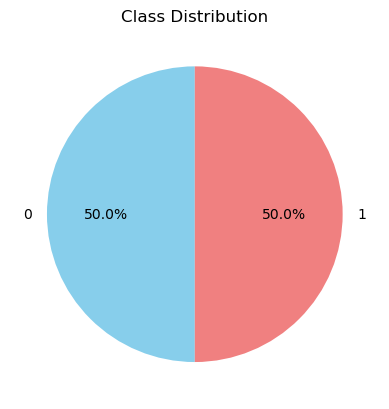

In [49]:
import matplotlib.pyplot as plt

# Assuming df_upsampled is your DataFrame after upsampling
# Replace 'Category' with your actual column name for the target variable
class_distribution = df_upsampled['Category'].value_counts()

# Create a pie chart
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Assuming your dataset has columns named 'Category' and 'Message'
# If not, replace these with your actual column names
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Upsample the minority class (spam)
df_minority = df[df['Category'] == 1]
df_majority = df[df['Category'] == 0]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Convert labels to numpy array
y = np.asarray(df_upsampled['Category'])

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df_upsampled['Message'])
X_sequences = tokenizer.texts_to_sequences(df_upsampled['Message'])

# Pad sequences to have consistent length
max_sequence_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Build the LSTM model
embedding_dim = 50  # Adjust as needed
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  # Binary classification (spam or ham)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
epochs = 5  # Adjust as needed
batch_size = 32  # Adjust as needed
model.fit(X_padded, y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")
test_predictions = model.predict_classes(X_test_padded)

# Evaluate accuracy and precision
test_accuracy = accuracy_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)

# Display the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision Score: {precision:.4f}")


Epoch 1/5
242/242 [==============================] - 22s 83ms/step - loss: 0.6662 - accuracy: 0.6249 - val_loss: 0.9194 - val_accuracy: 0.0000e+00
Epoch 2/5
242/242 [==============================] - 20s 84ms/step - loss: 2547367.7500 - accuracy: 0.6250 - val_loss: 0.9724 - val_accuracy: 0.0000e+00
Epoch 3/5
242/242 [==============================] - 21s 85ms/step - loss: 0.6639 - accuracy: 0.6250 - val_loss: 0.9682 - val_accuracy: 0.0000e+00
Epoch 4/5
242/242 [==============================] - 20s 82ms/step - loss: 0.6634 - accuracy: 0.6250 - val_loss: 0.9820 - val_accuracy: 0.0000e+00
Epoch 5/5
242/242 [==============================] - 20s 82ms/step - loss: 0.6632 - accuracy: 0.6250 - val_loss: 0.9783 - val_accuracy: 0.0000e+00


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Label encode the 'Category' column
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

# Separate spam and ham messages
df_minority = df[df['Category'] == 1]
df_majority = df[df['Category'] == 0]

# Apply oversampling to balance the dataset
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Tokenize the messages
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df_upsampled['Message'])
X_sequences = tokenizer.texts_to_sequences(df_upsampled['Message'])

# Pad sequences to a consistent length
max_sequence_length = 100
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding="post", truncating="post")

# Convert labels to numpy array
y = np.asarray(df_upsampled['Category'])

# Build the LSTM model
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
epochs = 10
batch_size = 64
model.fit(X_padded, y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post", truncating="post")



Epoch 1/10
121/121 [==============================] - 17s 126ms/step - loss: 0.6681 - accuracy: 0.6199 - val_loss: 0.9988 - val_accuracy: 0.0000e+00
Epoch 2/10
121/121 [==============================] - 15s 124ms/step - loss: 0.6649 - accuracy: 0.6250 - val_loss: 0.9388 - val_accuracy: 0.0000e+00
Epoch 3/10
121/121 [==============================] - 15s 128ms/step - loss: 0.6634 - accuracy: 0.6250 - val_loss: 1.0028 - val_accuracy: 0.0000e+00
Epoch 4/10
121/121 [==============================] - 15s 124ms/step - loss: 67337.8359 - accuracy: 0.6250 - val_loss: 0.9847 - val_accuracy: 0.0000e+00
Epoch 5/10
121/121 [==============================] - 15s 124ms/step - loss: 0.6638 - accuracy: 0.6250 - val_loss: 0.9793 - val_accuracy: 0.0000e+00
Epoch 6/10
121/121 [==============================] - 16s 135ms/step - loss: 0.6623 - accuracy: 0.6250 - val_loss: 0.9694 - val_accuracy: 0.0000e+00
Epoch 7/10
121/121 [==============================] - 15s 123ms/step - loss: 0.6627 - accuracy: 0.6250

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [3]:
# Predict probabilities
# Predict probabilities
test_probabilities = model.predict(X_test_padded)

# Apply a threshold (e.g., 0.5) to convert probabilities to class predictions
threshold = 0.5
test_predictions = (test_probabilities > threshold).astype(int)

# Evaluate accuracy and precision
test_accuracy = accuracy_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)

# Display the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision Score: {precision:.4f}")

35/35 [==============================] - 1s 24ms/step
Test Accuracy: 86.64%
Confusion Matrix:
[[966   0]
 [149   0]]
Precision Score: 0.0000


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
